In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

pd.options.mode.chained_assignment = None

In [ ]:
data = pd.read_csv("avocado.csv")

data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# 대충 읽어보니 내가 이해 할 수 없는 데이터
## 4046 4225 4770 얘네는 일단 빼고 해봐야겠다.

In [ ]:
data = data.drop(["4046", "4225", "4770"], axis=1)
data

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# 실수형 데이터와 범주형 데이터로 구분해보면 
# 타입과 지역이 범주형 데이터이다 

In [ ]:
# 지역이 몇개나 되는지 대충 파악해 봤다.
num = 0
for i in data["region"].unique():
  num += 1
print(data["region"].unique())
print(f"총합: {num}")


['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
총합: 54


In [ ]:
# type에도 같은 방법을 적용해 주었다.
num = 0
for i in data["type"].unique():
  num += 1
print(data["type"].unique())
print(f"총합: {num}")
#유기농이랑 그냥 전통적인 방식 같다.

['conventional' 'organic']
총합: 2


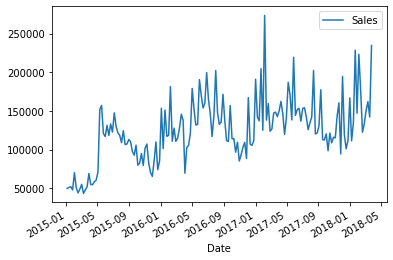

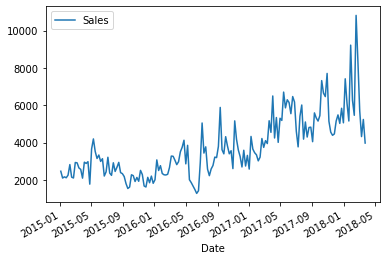

In [ ]:
data_Albany = data[data["region"] == "Albany"]

#매출량 계산하기
Sales = data_Albany["AveragePrice"] * data_Albany["Total Volume"]
data_Albany["Sales"] = Sales
data_Albany
#시계열 데이터를 활용해서 시각화
data_Albany_conventional = data_Albany[data_Albany["type"] == "conventional"]
data_Albany_conventional['Date'] = pd.to_datetime(data_Albany_conventional['Date'])
data_Albany_conventional.plot(x='Date', y='Sales')

#시계열 데이터를 활용해서 시각화
data_Albany_organic = data_Albany[data_Albany["type"] == "organic"]
data_Albany_organic['Date'] = pd.to_datetime(data_Albany_organic['Date'])
data_Albany_organic.plot(x='Date', y='Sales')


유통량이 일반적인 아보카도가 압도적으로 많다. ㄷㄷ

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


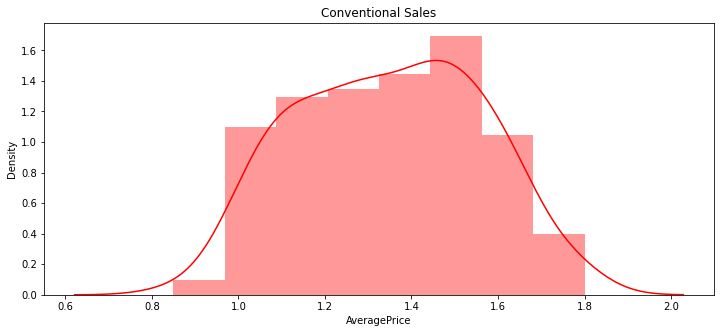

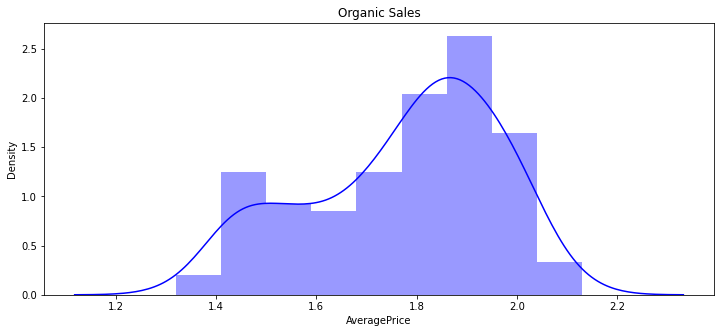

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Conventional Sales")
ax = sns.distplot(data_Albany_conventional["AveragePrice"], color = 'r')

pl.figure(figsize=(12,5))
pl.title("Organic Sales")
ax = sns.distplot(data_Albany_organic["AveragePrice"], color = 'b')


정규분포와 대충 비슷한 모양을 하고 있다. 
스케일을 보면 유기농이 확실히 비싼가 보다

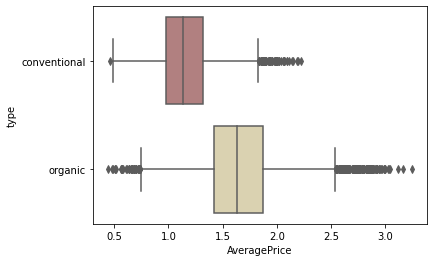

In [ ]:
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'pink')
